# Weather temperature reports - Ann arbor Michigan


In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


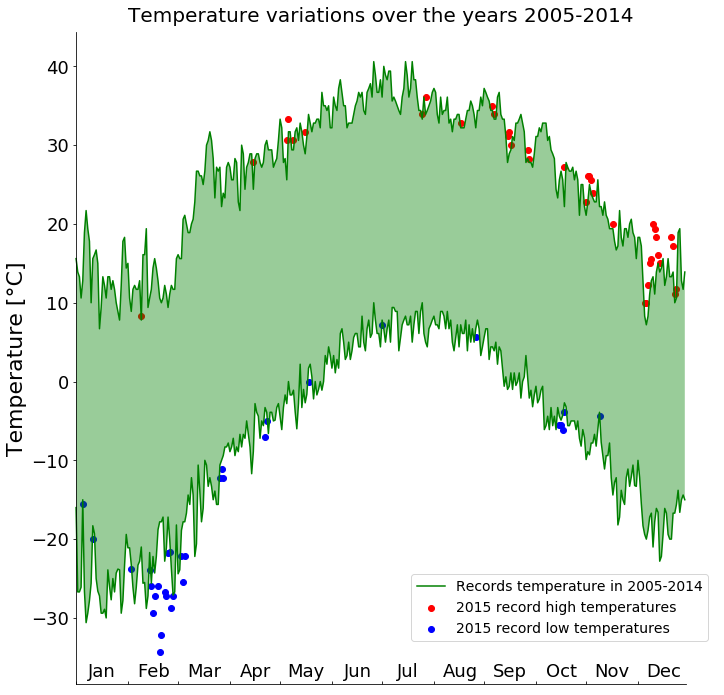

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def filter_dataframe(df):
    df = df.sort_values("Date")
    df["Data_Value"] /= 10
    dates = []
    for d in list(df["Date"]):
        dates.append(d[5:])
    df["Date"] = dates

    df = df[df["Date"] != "02-29"]
    
    df_groupby_dates = df["Data_Value"].groupby(df["Date"])
    df_min_max = df_groupby_dates.agg([np.max, np.min])
    df_min_max.rename(columns={"amax":"max", "amin":"min"}, inplace=True)
    df_min_max.reset_index(inplace=True)
    
    return df_min_max

df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df_span_10 = df[df["Date"] < "2015"]
df_2015 = df[df["Date"] >= "2015"]
df_span_10 = filter_dataframe(df_span_10)
df_2015 = filter_dataframe(df_2015)

df_merge = pd.merge(df_span_10, df_2015, on="Date", how = "outer")
df_max = df_merge[(df_merge["max_y"] > df_merge["max_x"])]
df_min = df_merge[(df_merge["min_y"] < df_merge["min_x"])]


#######################################################################################################################
# Plotting section
fig = plt.figure(figsize=(12,12), facecolor="white")
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=22) 
plt.rc('legend', fontsize=14)
temp = plt.plot(range(len(df_span_10["Date"])), df_span_10["max"],color="green", label="Records temperature in 2005-2014")
temp2 = plt.plot(range(len(df_span_10["Date"])), df_span_10["min"],color="green", label="---ads")
scat_max = plt.scatter(df_max.index, df_max["max_y"], c = "red", label="2015 record high temperatures")
scat_min = plt.scatter(df_min.index, df_min["min_y"], c = "blue", label="2015 record low temperatures")
plt.gca().fill_between(range(len(df_span_10["Date"])), df_span_10["max"], df_span_10["min"], facecolor="green", alpha= 0.4)
plt.ylabel("Temperature [°C]")
plt.xticks([0,31,61,92,122, 153, 183, 214, 244, 275, 305, 336], ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",\
                                                                     "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.legend(handles=[temp[0],scat_max, scat_min], bbox_to_anchor=(1,0.18), loc=1 )
plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines["bottom"].set_bounds(0,365)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().tick_params(axis="x",direction="in", pad=-22)
import matplotlib.transforms
# Create offset transform by 5 points in x direction
dx = +26/72.; dy = 0/72. 
offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
# apply offset transform to all x ticklabels.
for label in plt.gca().xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'}
plt.title("Temperature variations over the years 2005-2014", title_font)
plt.show()